In [4]:
import numpy as np
import matplotlib.pyplot as plt


def lin_force_kernel_fs(x, y, xf, yf, w, nu, mu):
    """
    Compute displacement and stress kernels for a linearly varying force on a horizontal source element.

    Parameters:
    x, y : array_like
        Observation locations provided as individual vectors [Nobs x 1]
    xf, yf : float
        Source element center location
    w : float
        Source element half-length
    nu, mu : float
        Elastic parameters

    Returns:
    Disp : ndarray
        Displacement kernels [Nobs x (ux or uy) x (fx or fy) x 2 basis functions]
    Stress, Strain : ndarray
        Stress and strain kernels [Nobs x (sxx, sxy, syy) x (fx or fy) x 2 basis functions]
    """

    Nobs = len(x)

    xo = x - xf
    yo = y - yf

    fx = 1
    fy = 1

    # Helper functions
    def ux_1(fx, fy, w):
        term1 = (
            (1 / 8)
            * fx
            * w ** (-1)
            * (w - xo)
            * (3 * w + xo)
            * mu ** (-1)
            * nu
            * (np.pi - np.pi * nu) ** (-1)
            * np.log((w - xo) ** 2 + yo**2)
        )
        term2 = (
            (1 / 32)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4 * w * (8 * w * (nu - 1) + xo * (-3 + 4 * nu))
                - 16 * (w + xo) * yo * (nu - 1) * np.arctan((w - xo) / yo)
                - 16 * (w + xo) * yo * (nu - 1) * np.arctan((w + xo) / yo)
                + (3 * (w - xo) * (3 * w + xo) + yo**2 * (5 - 4 * nu))
                * np.log((w - xo) ** 2 + yo**2)
                + (
                    3 * (w + xo) ** 2
                    - 5 * yo**2
                    - 4 * (w + xo - yo) * (w + xo + yo) * nu
                )
                * np.log((w + xo) ** 2 + yo**2)
            )
        )
        term3 = (
            (1 / 16)
            * fy
            * np.pi ** (-1)
            * w ** (-1)
            * yo
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4 * w
                - 2 * yo * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
                + (w + xo)
                * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
            )
        )
        return (term1 + term2 + term3) / 2

    def ux_2(fx, fy, w):
        term1 = (
            (1 / 64)
            * fx
            * np.pi ** (-1)
            * w ** (-1)
            * (w - xo) ** 2
            * mu ** (-1)
            * (3 - 4 * nu)
            * (nu - 1) ** (-1)
            * np.log((w - xo) ** 2 + yo**2)
        )
        term2 = (
            (1 / 32)
            * np.pi ** (-1)
            * w ** (-1)
            * (w - xo)
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                (-8)
                * fx
                * yo
                * (nu - 1)
                * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
                + fy * yo * np.log((w - xo) ** 2 + yo**2)
            )
        )
        term3 = (
            (1 / 64)
            * np.pi ** (-1)
            * w ** (-1)
            * mu ** (-1)
            * (nu - 1) ** (-1)
            * (
                4
                * w
                * ((-2) * fy * yo + fx * xo * (3 - 4 * nu) + 8 * fx * w * (nu - 1))
                + yo**2
                * (
                    4 * fy * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
                    + fx * (-5 + 4 * nu) * np.log((w - xo) ** 2 + yo**2)
                )
                + (
                    2 * fy * (xo - w) * yo
                    + fx
                    * (
                        3 * (3 * w - xo) * (w + xo)
                        + 5 * yo**2
                        - 4 * (3 * w - xo) * (w + xo) * nu
                    )
                )
                * np.log((w + xo) ** 2 + yo**2)
            )
        )
        return term1 + term2 + term3

    def uy_1(fx, fy, w):
        return (1 / 32) * fx * np.pi ** (-1) * w ** (-1) * yo * mu ** (-1) * (
            1 - nu
        ) ** (-1) * (
            4 * w
            - 2 * yo * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
            + (w + xo) * (np.log((w - xo) ** 2 + yo**2) - np.log((w + xo) ** 2 + yo**2))
        ) + (
            1 / 64
        ) * fy * np.pi ** (
            -1
        ) * w ** (
            -1
        ) * mu ** (
            -1
        ) * (
            1 - nu
        ) ** (
            -1
        ) * (
            4 * w * (2 * w + xo) * (-3 + 4 * nu)
            + 8 * (w + xo) * yo * (1 - 2 * nu) * np.arctan((-w + xo) / yo)
            - 8 * (w + xo) * yo * (1 - 2 * nu) * np.arctan((w + xo) / yo)
            + (
                w**2 * (9 - 12 * nu)
                + yo**2 * (1 - 4 * nu)
                + 2 * w * xo * (-3 + 4 * nu)
                + xo**2 * (-3 + 4 * nu)
            )
            * np.log((w - xo) ** 2 + yo**2)
            - 1
            * (-3 * (w + xo) ** 2 + yo**2 + 4 * (w + xo - yo) * (w + xo + yo) * nu)
            * np.log((w + xo) ** 2 + yo**2)
        )

    def uy_2(fx, fy, w):
        return fx * (
            (-1 / 32)
            * np.pi ** (-1)
            * w ** (-1)
            * yo
            * mu ** (-1)
            * (1 - nu) ** (-1)
            * (
                4 * w
                + (-2) * yo * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
                + (-1) * w
                + xo
            )
            * np.log((w - xo) ** 2 + yo**2)
            + (w - xo)
            * yo
            * (32 * np.pi * w * mu + (-32) * np.pi * w * mu * nu) ** (-1)
            * np.log(w**2 + 2 * w * xo + xo**2 + yo**2)
        ) + fy * (
            (-1 / 8)
            * np.pi ** (-1)
            * w ** (-1)
            * (w - xo)
            * yo
            * mu ** (-1)
            * (1 - nu) ** (-1)
            * (1 - 2 * nu)
            * (np.arctan((w - xo) / yo) + np.arctan((w + xo) / yo))
            + (1 / 64)
            * np.pi ** (-1)
            * w ** (-1)
            * (w - xo) ** 2
            * mu ** (-1)
            * (3 - 4 * nu)
            * (1 - nu) ** (-1)
            * np.log((w - xo) ** 2 + yo**2)
            + (1 / 64)
            * np.pi ** (-1)
            * w ** (-1)
            * mu ** (-1)
            * (1 - nu) ** (-1)
            * (
                4 * w * (2 * w - xo) * (-3 + 4 * nu)
                + yo**2 * (1 - 4 * nu) * np.log((w - xo) ** 2 + yo**2)
                + (
                    3 * (3 * w - xo) * (w + xo)
                    + yo**2
                    - 4 * ((3 * w - xo) * (w + xo) + yo**2) * nu
                )
                * np.log((w + xo) ** 2 + yo**2)
            )
        )

    Disp = np.zeros((Nobs, 2, 2, 2))
    # fx kernels
    Disp[:, 0, 0, :] = np.hstack([ux_1(fx, 0, w), ux_2(fx, 0, w)])
    Disp[:, 1, 0, :] = np.hstack([uy_1(fx, 0, w), uy_2(fx, 0, w)])
    # fy kernels
    Disp[:, 0, 1, :] = np.hstack([ux_1(0, fy, w), ux_2(0, fy, w)])
    Disp[:, 1, 1, :] = np.hstack([uy_1(0, fy, w), uy_2(0, fy, w)])

    return Disp

In [5]:
x_offset = 0.0
y_offset = 0.0

mu = 1
nu = 0.25
nx = 60
ny = 60
x_vec = np.linspace(-2.0, 2.0, nx)
y_vec = np.linspace(-2.0, 2.0, ny)
x_grid, y_grid = np.meshgrid(x_vec, y_vec)

# np.shape(x_grid.reshape(-1, 1))

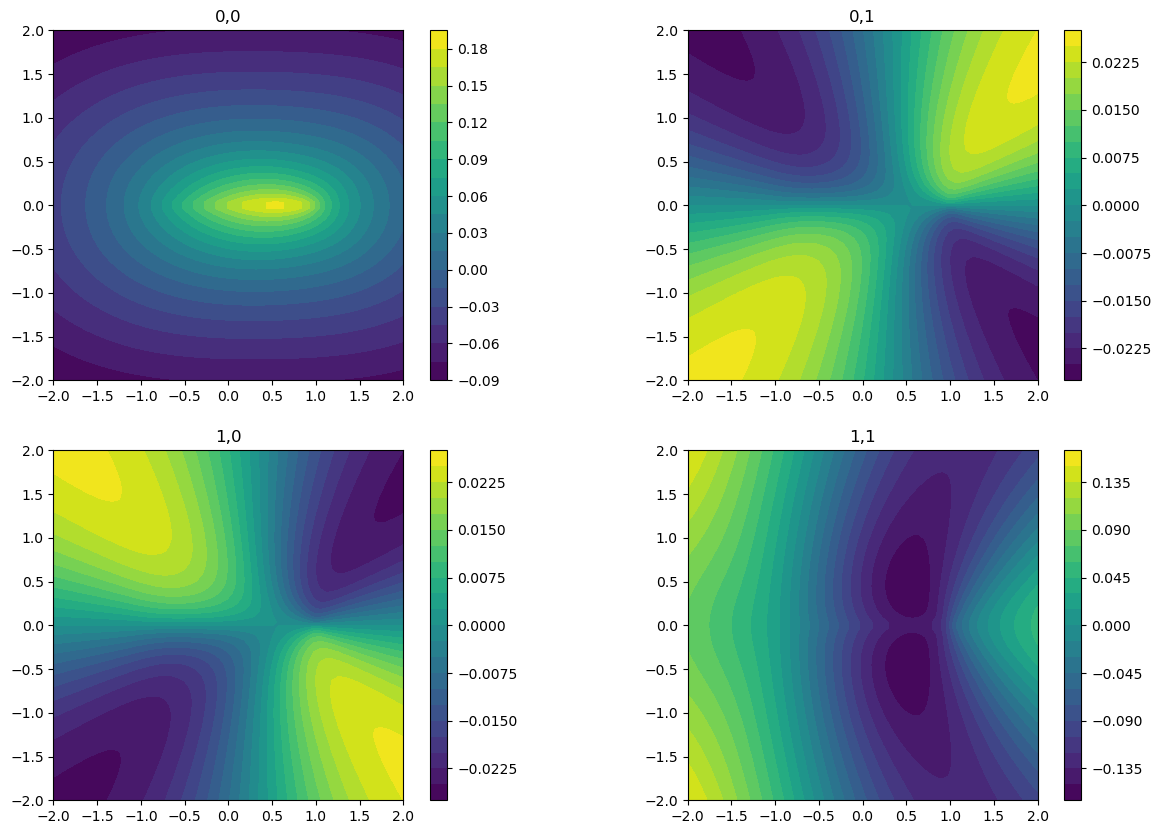

NameError: name 'ux' is not defined

<Figure size 640x480 with 0 Axes>

In [6]:
# Displacement kernels [Nobs x (ux or uy) x (fx or fy) x 2 basis functions]
Dkernels = lin_force_kernel_fs(
    x_grid.reshape(-1, 1),
    y_grid.reshape(-1, 1),
    xf=x_offset,
    yf=y_offset,
    w=1,
    nu=nu,
    mu=mu,
)


# def ux_1(xo, yo, fx, fy, w, mu, nu):


# plot fx kernels
# ux = ux_1(x_grid, y_grid, 1.0, 0, 1, mu, nu)
uy = Dkernels[:, 1, 0, 0]  # + Dkernels[:, 1, 0, 1]


plt.figure(figsize=(15, 10))
for i in range(0, 2):
    for j in range(0, 2):
        plotval = i * 2 + j + 1
        toplot = Dkernels[:, i, j, 0]
        plt.subplot(2, 2, plotval)
        plt.contourf(x_grid, y_grid, toplot.reshape(ny, nx), 20)
        plt.colorbar()
        plt.title(str(i) + "," + str(j))
        plt.gca().set_aspect("equal", adjustable="box")

plt.show()

plt.figure()
plt.contourf(x_grid, y_grid, ux, 20)
plt.colorbar()
plt.gca().set_aspect("equal", adjustable="box")
plt.show()